In [1]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

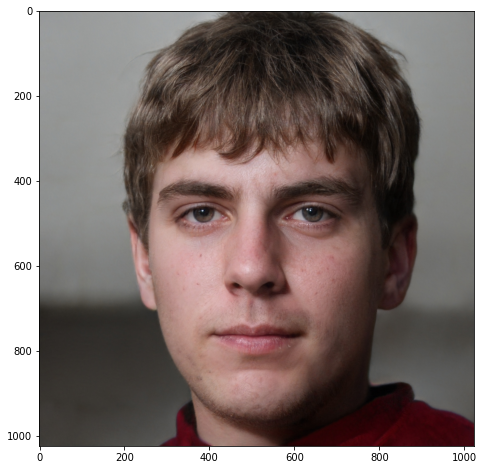

In [3]:
# image generated from https://thispersondoesnotexist.com/

img_path = "../input/image.jpg"

src = cv2.imread(img_path)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
img = src.copy()
plt.imshow(img)
plt.savefig("before.png")

In [4]:
drawing = mp.solutions.drawing_utils
drawing_spec = drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0, 255, 0))

drawing_styles = mp.solutions.drawing_styles

face_mesh = mp.solutions.face_mesh
face_detector = face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [5]:
results = face_detector.process(img)
face_landmarks = results.multi_face_landmarks

In [6]:
# for face_landmark in face_landmarks:
drawing.draw_landmarks(
    image=img,
    landmark_list=face_landmarks[0],
    connections=face_mesh.FACEMESH_TESSELATION,
    connection_drawing_spec=drawing_styles.get_default_face_mesh_tesselation_style())

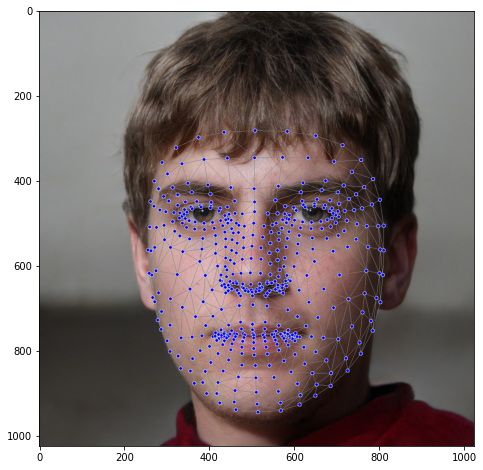

In [7]:
plt.imshow(img)
plt.savefig("detection.png")

In [8]:
gray = np.zeros((src.shape[0], src.shape[1], 3), dtype=np.uint8)

In [9]:
lips_idx = list(face_mesh.FACEMESH_LIPS)
lips = np.ravel(lips_idx)
lips    

array([270, 409, 317, 402,  81,  82,  91, 181,  37,   0,  84,  17, 269,
       270, 321, 375, 318, 324, 312, 311, 415, 308,  17, 314,  61, 146,
        78,  95,   0, 267,  82,  13, 314, 405, 178,  87, 267, 269,  61,
       185,  14, 317,  88, 178, 185,  40, 405, 321,  13, 312, 324, 308,
       409, 291, 146,  91,  87,  14,  78, 191,  95,  88, 311, 310,  39,
        37,  40,  39, 402, 318, 191,  80,  80,  81, 310, 415, 181,  84,
       375, 291])

In [10]:
empty_lip = []
for i in lips:
    pt1 = face_landmarks[0].landmark[i]
    x = int(pt1.x * img.shape[1])
    y = int(pt1.y * img.shape[0])
    empty_lip.append((x, y))
    

In [11]:
convexhull  = cv2.convexHull(np.array(empty_lip))
mask = cv2.fillConvexPoly(gray, convexhull, ((100, 30, 100)))
mask = cv2.GaussianBlur(mask, (7, 7), 20)

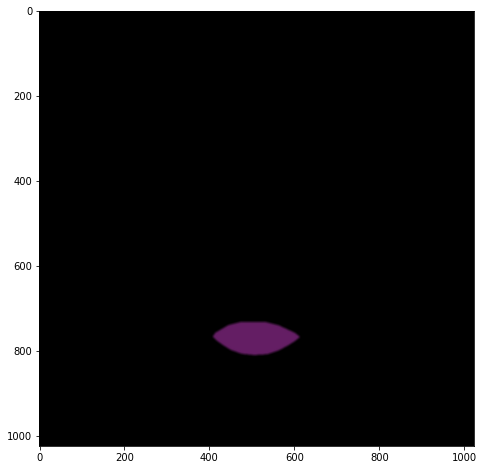

In [12]:
plt.imshow(mask)
plt.savefig("mask.png")

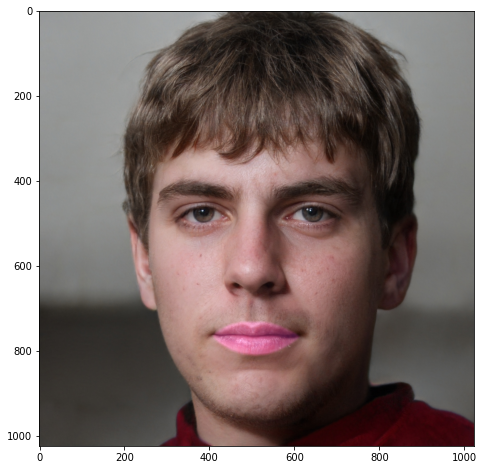

In [13]:
resulting_image = cv2.addWeighted(mask, 0.5, src, 1, 0.)
plt.imshow(resulting_image)
plt.savefig("after.png")

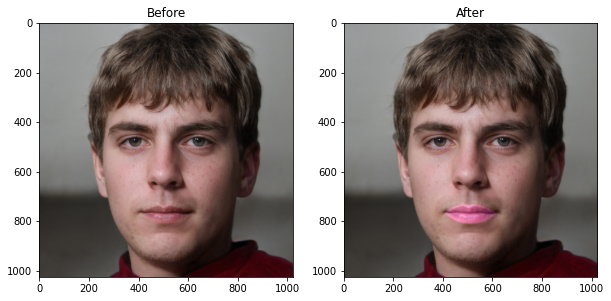

In [14]:
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.set_title("Before")
ax0.imshow(src)
ax1.set_title("After")
ax1.imshow(resulting_image)